In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
import pandas as pd
import numpy as np
import random
import mofr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error,mean_squared_error, mean_squared_log_error)
from xgboost import XGBRegressor, plot_tree
import math

import xgboost as xgb
import hyperopt

In [69]:
seed=1234

In [70]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv")

In [71]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [73]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Data Exploration

In [74]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [75]:
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# Predictor checking

In [76]:
from mofr.basic_evaluators.HistogramContinuous import HistogramContinuousEvaluator

hcoe=HistogramContinuousEvaluator()

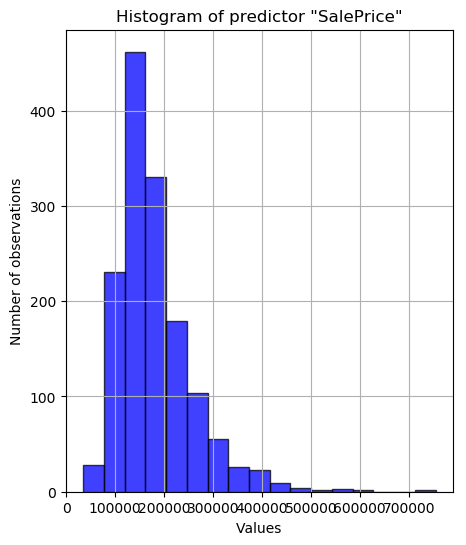

In [77]:
hcoe.d(train).pc('SalePrice')
hcoe.get_graph()

# Data transformations

In [78]:
col_target='SalePrice'
col_exclude=[
'Id',
col_target
]

## Categorical transformations

In [79]:
import category_encoders as ce

In [80]:
# potential predictors without encoding
cat_preds = [col for col in train.select_dtypes(include="object") if col not in col_exclude]
bool_preds = [col for col in train.select_dtypes(include="bool") if col not in col_exclude]
datetime_preds = [col for col in train.select_dtypes(include="datetime") if col not in col_exclude]

### Target Encoding

In [81]:
# # bayesian target encoding
# encoder = ce.TargetEncoder(min_samples_leaf=1, smoothing=1.0)
# encoder.fit_transform(train[cat_preds], train[col_target])

# train = pd.concat([train, encoder.transform(train[cat_preds]).add_prefix("BAYES_")], axis=1)
# test = pd.concat([test, encoder.transform(test[cat_preds]).add_prefix("BAYES_")], axis=1)

### One-Hot Encoding

In [82]:
encoder = ce.OneHotEncoder()
encoder.fit_transform(train[cat_preds], train[col_target])

train = pd.concat([train, encoder.transform(train[cat_preds]).add_prefix("ONEHOT_")], axis=1)
test = pd.concat([test, encoder.transform(test[cat_preds]).add_prefix("ONEHOT_")], axis=1)

In [83]:
col_preds=[col for col in train.select_dtypes(include=["int","float"]) if col!=col_target]

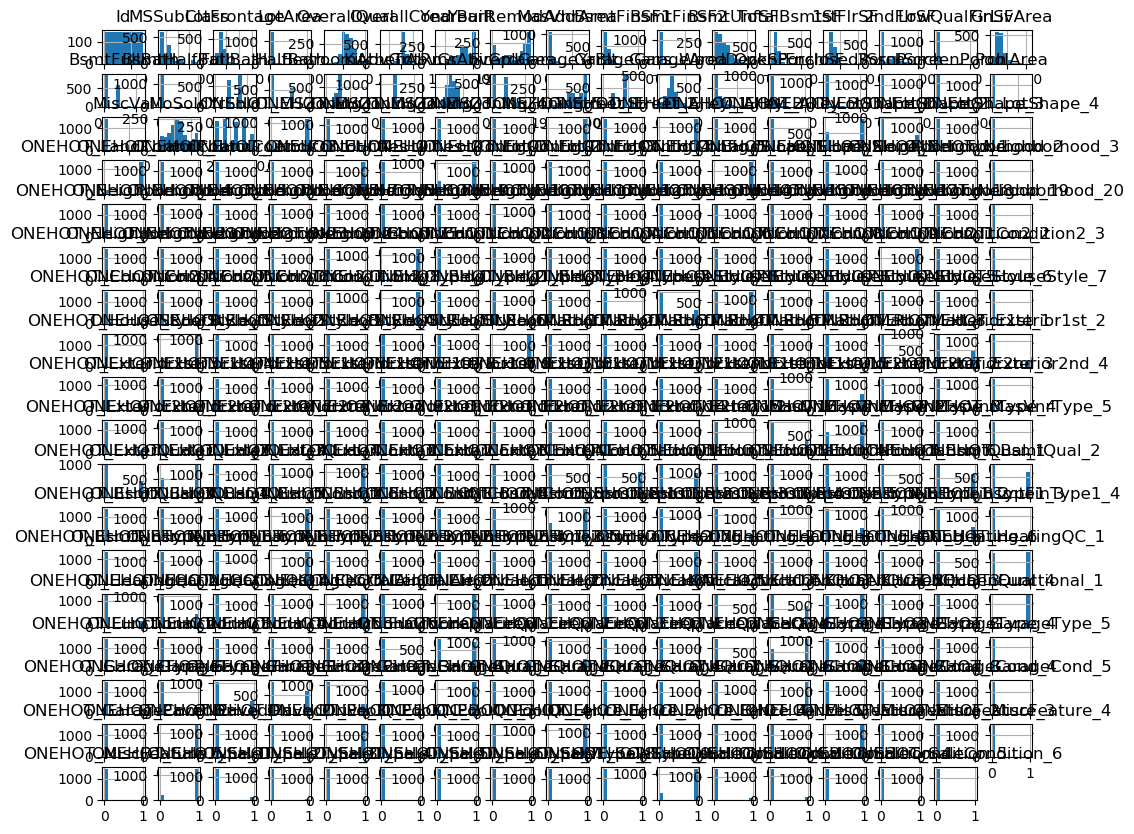

In [84]:
#showing the data
train[col_preds].hist(figsize = (12,10))
plt.show()

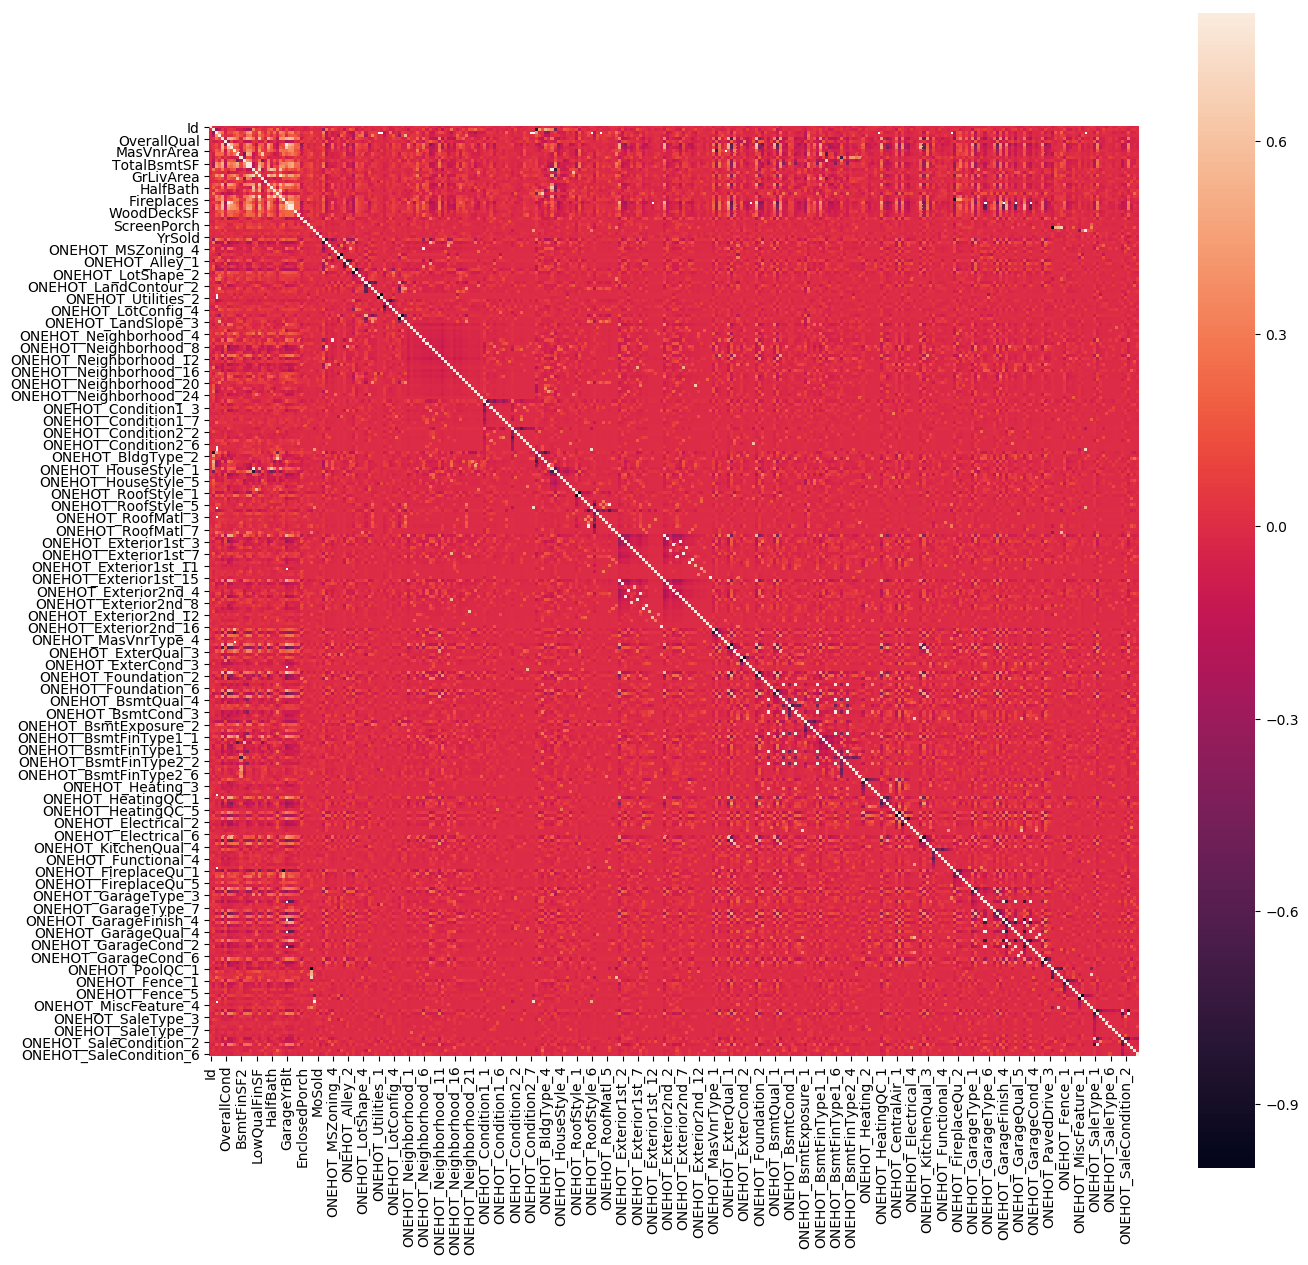

In [85]:
#correlations map
C_mat = train[col_preds].corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

# Fitting models

In [86]:
(train[col_target]>0).value_counts()

True    1460
Name: SalePrice, dtype: int64

In [87]:
results=[]
for col in col_preds:
    results.append((col, mean_absolute_error(train[col_target], train[col].fillna(np.mean(train[col])))))

pd.DataFrame(results, columns=['Predictor', 'MAE']).sort_values(by='MAE', ascending=True)

,Predictor,MAE
3,LotArea,170404.367808
36,YrSold,178913.380137
7,YearRemodAdd,178936.330137
25,GarageYrBlt,178942.689727
6,YearBuilt,178949.928082
...,...,...
147,ONEHOT_Exterior1st_14,180921.195205
132,ONEHOT_RoofMatl_7,180921.195205
145,ONEHOT_Exterior1st_12,180921.195205
231,ONEHOT_Electrical_5,180921.195205


In [88]:
X_train, X_valid, y_train, y_valid= train_test_split(train[0:1200], train[col_target][0:1200], test_size=0.2, random_state=seed)

## XGBoost model

### Hyperopt

In [114]:
from hyperopt import fmin, tpe, hp, anneal, Trials, STATUS_OK

In [115]:
space={'max_depth': hp.quniform("max_depth", 3, 6, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 100,
        'seed': 0
    }

In [116]:
def objective(space):
    clf=xgb.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train[col_preds], y_train), ( X_valid[col_preds], y_valid)]
    
    clf.fit(X_train[col_preds], y_train,
            eval_set=evaluation, eval_metric="rmsle",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_valid[col_preds])
    mae = mean_absolute_error(y_valid, pred)
    print ("SCORE:", mae)
    return {'loss': -mae, 'status': STATUS_OK }

In [117]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                 
24980.3611328125                                                                                                       
SCORE:                                                                                                                 
25436.745963541667                                                                                                     
SCORE:                                                                                                                 
24706.514208984376                                                                                                     
SCORE:                                                                                                                 
24197.293717447916                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
25185.051334635416                                                                                                     
SCORE:                                                                                                                 
26066.343587239582                                                                                                     
SCORE:                                                                                                                 
25302.969873046874                                                                                                     
SCORE:                                                                                                                 
25185.18972981771                                                                                                      
SCORE:                                  

In [119]:
best_hyperparams['max_depth']=int(best_hyperparams['max_depth'])
best_hyperparams

{'colsample_bytree': 0.5760780855202243,
 'gamma': 8.434422758167566,
 'max_depth': 6,
 'min_child_weight': 4.0,
 'reg_alpha': 100.0,
 'reg_lambda': 0.4374001708653249}

### Training the model

In [127]:
train_rmse=[]
valid_rmse=[]
oot_rmse=[]

train_mae=[]
valid_mae=[]
oot_mae=[]


n=1
train['FINAL_SCORE_AVG']=0
test['FINAL_SCORE_AVG']=0

train = train.sample(frac=1).reset_index(drop=True)
#test = test.sample(frac=1).reset_index(drop=True)

In [128]:
for random_seed in range(50):
    X_train, X_valid, y_train, y_valid= train_test_split(train, train[col_target], test_size=0.2, random_state=random_seed)

    xgb_model = XGBRegressor(**best_hyperparams)
    xgb_model.fit(X_train.loc[:, col_preds], X_train[col_target], verbose=0, eval_metric='rmsle')
    

    train['FINAL_SCORE'] =xgb_model.predict(train[col_preds])
    X_train['FINAL_SCORE'] =xgb_model.predict(X_train[col_preds])
    X_valid['FINAL_SCORE'] = xgb_model.predict(X_valid[col_preds])
    test['FINAL_SCORE'] =xgb_model.predict(test[col_preds])

        
    train['FINAL_SCORE_AVG'] =(train['FINAL_SCORE_AVG']*n+ xgb_model.predict(train[col_preds]))/(n+1)
    X_train['FINAL_SCORE_AVG'] =(X_train['FINAL_SCORE_AVG']*n+xgb_model.predict(X_train[col_preds]))/(n+1)
    X_valid['FINAL_SCORE_AVG'] = (X_valid['FINAL_SCORE_AVG']*n+xgb_model.predict(X_valid[col_preds]))/(n+1)
    test['FINAL_SCORE_AVG'] = (test['FINAL_SCORE_AVG']*n+xgb_model.predict(test[col_preds]))/(n+1)  
    n+=1 

    train_rmse.append(math.sqrt(mean_squared_log_error(X_train[col_target], X_train['FINAL_SCORE'])))
    valid_rmse.append(math.sqrt(mean_squared_log_error(X_valid[col_target], X_valid['FINAL_SCORE'])))
    oot_rmse.append(math.sqrt(mean_squared_log_error(train[col_target][1200:-1], train['FINAL_SCORE'][1200:-1])))
    
    train_mae.append(mean_absolute_error(X_train[col_target], X_train['FINAL_SCORE']))
    valid_mae.append(mean_absolute_error(X_valid[col_target], X_valid['FINAL_SCORE']))
    oot_mae.append(mean_absolute_error(train[col_target][1200:-1], train['FINAL_SCORE'][1200:-1]))

In [129]:
np.std(oot_rmse)

0.017440445847616785

In [130]:
# print('The Lift on the whole set is: '+ str(np.mean(whole_lifts)))
# print('The gini on the whole set is: '+ str(np.mean(whole_ginis)))
# print('\n')
print('The average rmse on the train set is: '+ str(np.mean(train_rmse)))
print('The average rmse on the valid set is: '+ str(np.mean(valid_rmse)))
print('The average rmse on the oot set is: '+ str(np.mean(oot_rmse)))
print('\n')
print('The average mae on the train set is: '+ str(np.mean(train_mae)))
print('The average mae on the valid set is: '+ str(np.mean(valid_mae)))
print('The average mae on the oot set is: '+ str(np.mean(oot_mae)))

The average rmse on the train set is: 0.010591893997924451
The average rmse on the valid set is: 0.14440111152728147
The average rmse on the oot set is: 0.07358744956680759


The average mae on the train set is: 1074.6522711098032
The average mae on the valid set is: 18071.96367093857
The average mae on the oot set is: 5011.963956624034


In [131]:
# print('The Lift on the whole set is: '+ str(np.mean(whole_lifts)))
# print('The gini on the whole set is: '+ str(np.mean(whole_ginis)))
# print('\n')
print('The rmse on the train set is: '+ str(math.sqrt(mean_squared_log_error(X_train[col_target], X_train['FINAL_SCORE_AVG']))))
print('The rmse on the valid set is: '+ str(math.sqrt(mean_squared_log_error(X_valid[col_target], X_valid['FINAL_SCORE_AVG']))))
print('The rmse on the oot set is: '+ str(math.sqrt(mean_squared_log_error(train[col_target][1200:-1], train['FINAL_SCORE_AVG'][1200:-1]))))

The rmse on the train set is: 0.037466263460721495
The rmse on the valid set is: 0.04125049693666778
The rmse on the oot set is: 0.04376104289124208


In [132]:
test['SalePrice']=test['FINAL_SCORE_AVG']

In [133]:
test[['Id', 'SalePrice']].to_csv('Prediction_xgb_avg.csv', index=False)

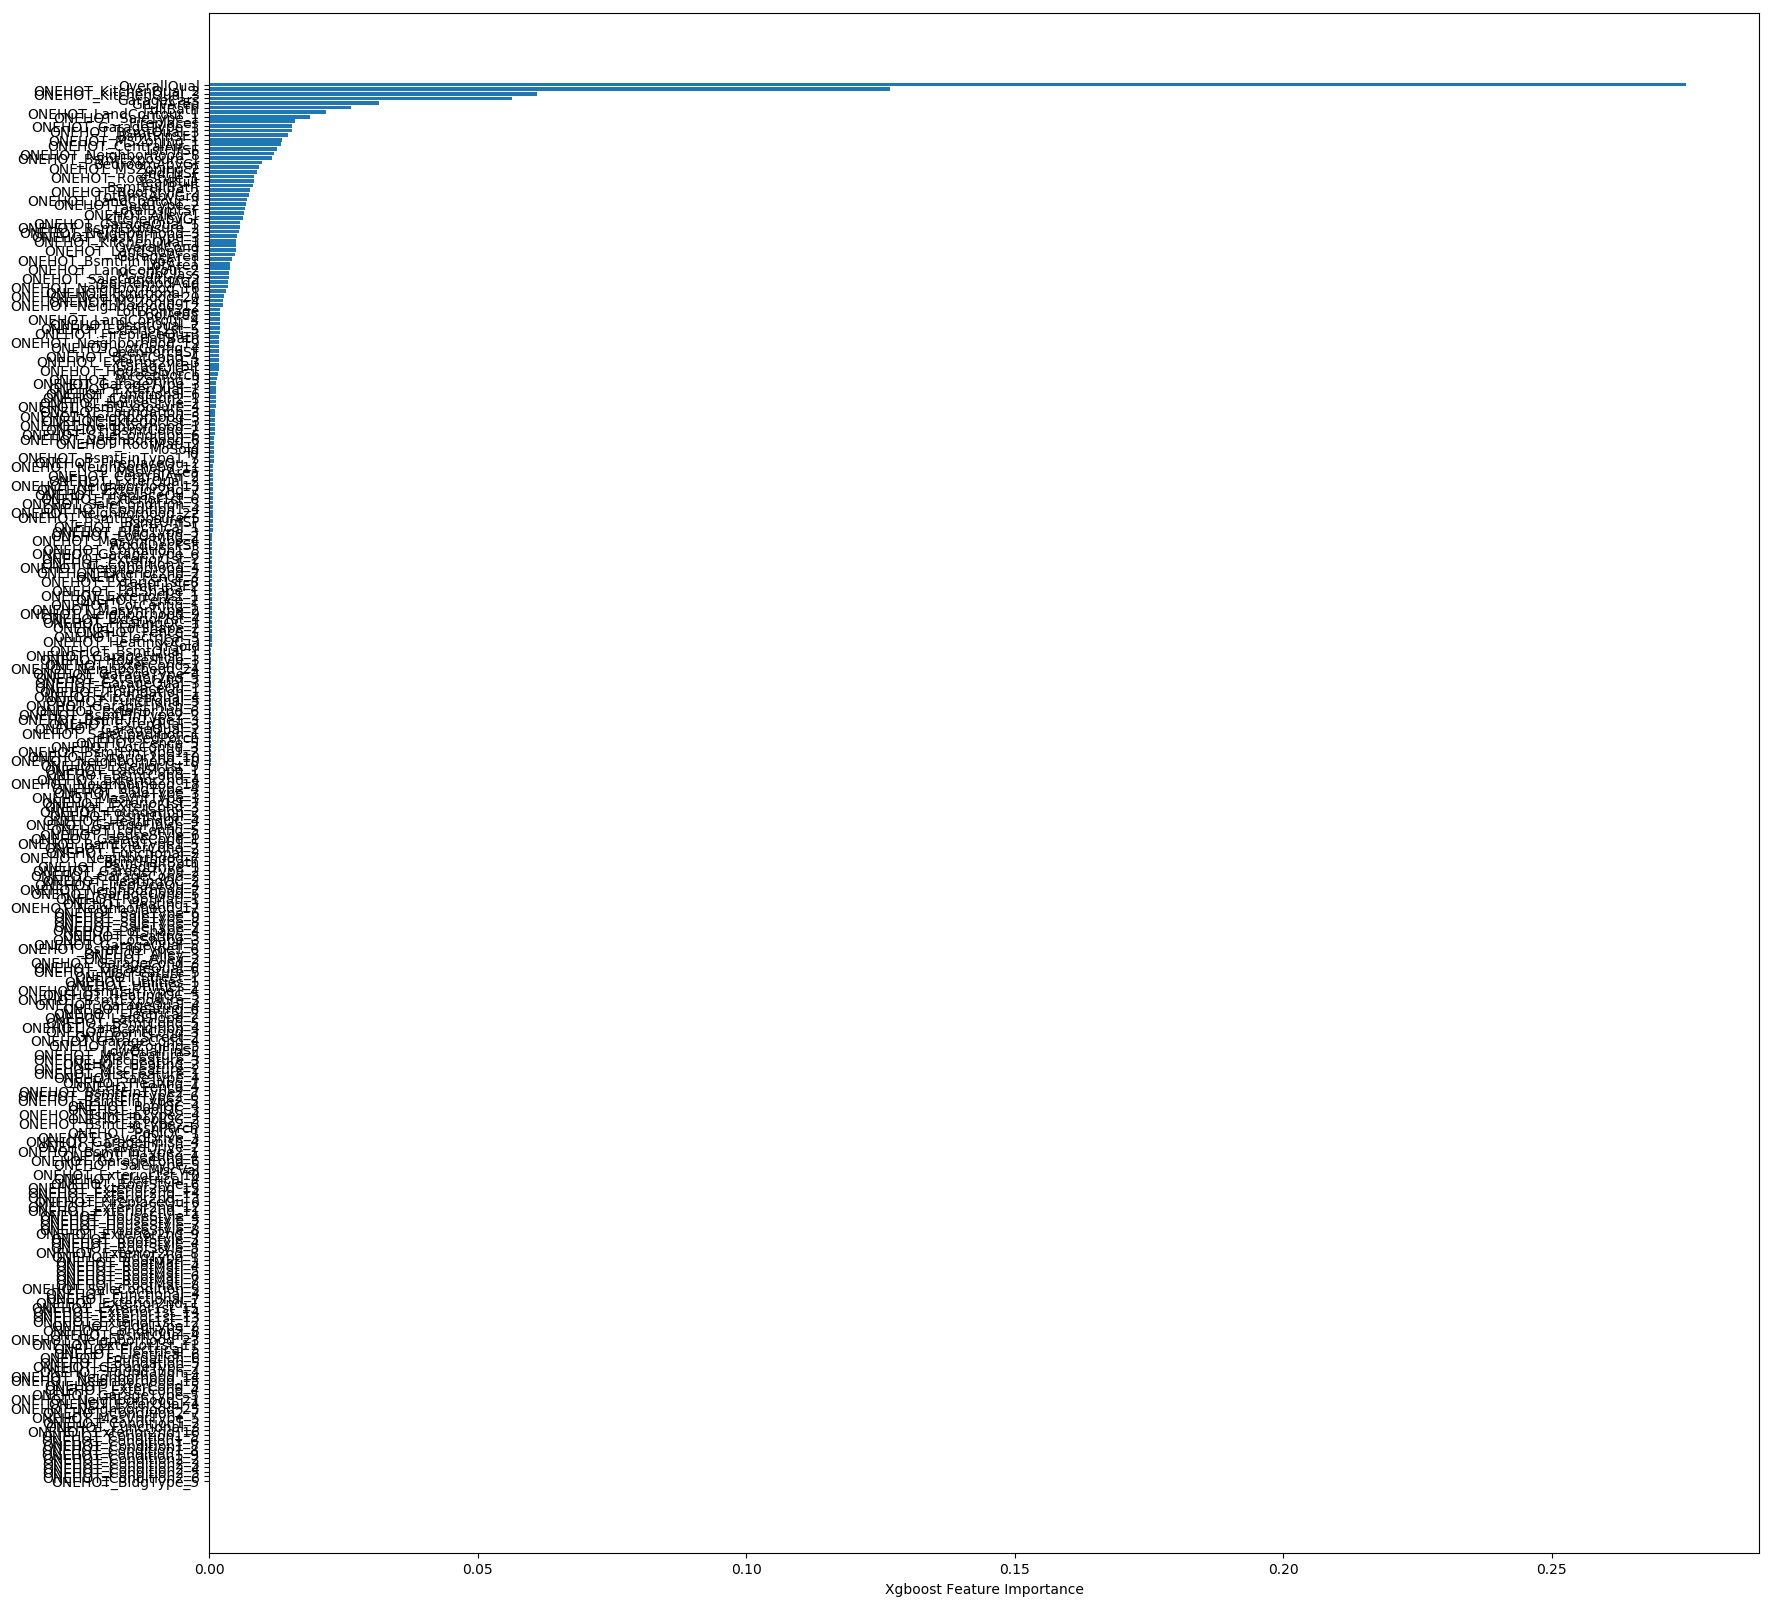

In [101]:
sorted_idx = xgb_model.feature_importances_.argsort()
order_ = []
for i in sorted_idx:
  order_.append(col_preds[i])
plt.figure(figsize=(20, 20))
fig = plt.barh(order_, xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()

## Neural network model

In [158]:
train = train.sample(frac=1, random_state=seed).reset_index(drop=True)

In [135]:
X_train, X_valid, y_train, y_valid= train_test_split(train[0:1200], train[col_target][0:1200], test_size=0.2, random_state=seed)

In [136]:
len(col_preds)

305

In [137]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=15, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    
    #layers.BatchNormalization(input_shape=[len(col_preds)]), #instead of preprocessing with sklearn

    # the hidden ReLU layers
    #layers.Dropout(rate=0.6), # apply 10% dropout to the next layer (to avoid overfitting)
    layers.Dense(units=512, input_shape=[len(col_preds)], activation='relu'),
    layers.BatchNormalization(), #instead of preprocessing with sklearn
    layers.Dropout(rate=0.6), # apply 10% dropout to the next layer (to avoid overfitting)
    layers.Dense(units=512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.6), # apply 10% dropout to the next layer (to avoid overfitting)
    layers.Dense(units=512, activation='relu'),
    layers.BatchNormalization(),
    # the linear output layer 
    layers.Dense(units=1), #activation='sigmoid' for binary problems
])

In [157]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               156672    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [143]:
model.compile(
    optimizer='adam',
    loss='mean_squared_logarithmic_error', #change to 'mae' or 'mse' for regression problems
)

In [144]:
history = model.fit(
    X_train[col_preds].fillna(100), X_train[col_target].fillna(100),
    validation_data=(X_valid[col_preds].fillna(100), X_valid[col_target].fillna(100)),
    batch_size=100,
    #callbacks=[early_stopping], # put your callbacks in a list
    epochs=2000,
    verbose=1, # suppress output since we'll plot the curves
)

Epoch 1/2000
10/10 [==============================] - 1s 27ms/step - loss: 10.7538 - val_loss: 10.8606
Epoch 2/2000
10/10 [==============================] - 0s 16ms/step - loss: 10.7052 - val_loss: 11.3274
Epoch 3/2000
10/10 [==============================] - 0s 14ms/step - loss: 10.6667 - val_loss: 11.1073
Epoch 4/2000
10/10 [==============================] - 0s 16ms/step - loss: 10.6296 - val_loss: 10.9756
Epoch 5/2000
10/10 [==============================] - 0s 15ms/step - loss: 10.5931 - val_loss: 10.8830
Epoch 6/2000
10/10 [==============================] - 0s 15ms/step - loss: 10.5575 - val_loss: 10.8048
Epoch 7/2000
10/10 [==============================] - 0s 15ms/step - loss: 10.5217 - val_loss: 10.7553
Epoch 8/2000
10/10 [==============================] - 0s 15ms/step - loss: 10.4861 - val_loss: 10.6794
Epoch 9/2000
10/10 [==============================] - 0s 15ms/step - loss: 10.4504 - val_loss: 10.6540
Epoch 10/2000
10/10 [==============================] - 0s 15ms/step - los

Epoch 81/2000
10/10 [==============================] - 0s 17ms/step - loss: 8.3935 - val_loss: 8.9427
Epoch 82/2000
10/10 [==============================] - 0s 17ms/step - loss: 8.3698 - val_loss: 8.9376
Epoch 83/2000
10/10 [==============================] - 0s 16ms/step - loss: 8.3470 - val_loss: 8.9058
Epoch 84/2000
10/10 [==============================] - 0s 16ms/step - loss: 8.3229 - val_loss: 8.8689
Epoch 85/2000
10/10 [==============================] - 0s 16ms/step - loss: 8.3003 - val_loss: 8.8476
Epoch 86/2000
10/10 [==============================] - 0s 16ms/step - loss: 8.2773 - val_loss: 8.7817
Epoch 87/2000
10/10 [==============================] - 0s 18ms/step - loss: 8.2544 - val_loss: 8.7613
Epoch 88/2000
10/10 [==============================] - 0s 16ms/step - loss: 8.2319 - val_loss: 8.7565
Epoch 89/2000
10/10 [==============================] - 0s 17ms/step - loss: 8.2096 - val_loss: 8.8357
Epoch 90/2000
10/10 [==============================] - 0s 17ms/step - loss: 8.1870

10/10 [==============================] - 0s 14ms/step - loss: 5.6453 - val_loss: 7.4174
Epoch 240/2000
10/10 [==============================] - 0s 13ms/step - loss: 5.6322 - val_loss: 7.2859
Epoch 241/2000
10/10 [==============================] - 0s 14ms/step - loss: 5.6188 - val_loss: 7.1222
Epoch 242/2000
10/10 [==============================] - 0s 15ms/step - loss: 5.6057 - val_loss: 6.7494
Epoch 243/2000
10/10 [==============================] - 0s 15ms/step - loss: 5.5926 - val_loss: 6.7851
Epoch 244/2000
10/10 [==============================] - 0s 16ms/step - loss: 5.5794 - val_loss: 6.7976
Epoch 245/2000
10/10 [==============================] - 0s 14ms/step - loss: 5.5672 - val_loss: 6.8588
Epoch 246/2000
10/10 [==============================] - 0s 15ms/step - loss: 5.5537 - val_loss: 6.8201
Epoch 247/2000
10/10 [==============================] - 0s 14ms/step - loss: 5.5405 - val_loss: 6.9234
Epoch 248/2000
10/10 [==============================] - 0s 14ms/step - loss: 5.5282 - va

10/10 [==============================] - 0s 21ms/step - loss: 3.9521 - val_loss: 4.7719
Epoch 398/2000
10/10 [==============================] - 0s 19ms/step - loss: 3.9436 - val_loss: 4.8168
Epoch 399/2000
10/10 [==============================] - 0s 18ms/step - loss: 3.9354 - val_loss: 4.7609
Epoch 400/2000
10/10 [==============================] - 0s 19ms/step - loss: 3.9269 - val_loss: 4.8785
Epoch 401/2000
10/10 [==============================] - 0s 20ms/step - loss: 3.9173 - val_loss: 4.8683
Epoch 402/2000
10/10 [==============================] - 0s 15ms/step - loss: 3.9089 - val_loss: 4.9365
Epoch 403/2000
10/10 [==============================] - 0s 16ms/step - loss: 3.9002 - val_loss: 4.8366
Epoch 404/2000
10/10 [==============================] - 0s 16ms/step - loss: 3.8920 - val_loss: 4.8164
Epoch 405/2000
10/10 [==============================] - 0s 15ms/step - loss: 3.8829 - val_loss: 4.8595
Epoch 406/2000
10/10 [==============================] - 0s 19ms/step - loss: 3.8742 - va

10/10 [==============================] - 0s 14ms/step - loss: 2.7812 - val_loss: 3.4803
Epoch 556/2000
10/10 [==============================] - 0s 14ms/step - loss: 2.7753 - val_loss: 3.7515
Epoch 557/2000
10/10 [==============================] - 0s 14ms/step - loss: 2.7697 - val_loss: 3.7213
Epoch 558/2000
10/10 [==============================] - 0s 14ms/step - loss: 2.7631 - val_loss: 3.9149
Epoch 559/2000
10/10 [==============================] - 0s 14ms/step - loss: 2.7566 - val_loss: 3.6680
Epoch 560/2000
10/10 [==============================] - 0s 14ms/step - loss: 2.7511 - val_loss: 3.6421
Epoch 561/2000
10/10 [==============================] - 0s 14ms/step - loss: 2.7445 - val_loss: 3.5636
Epoch 562/2000
10/10 [==============================] - 0s 14ms/step - loss: 2.7382 - val_loss: 3.5397
Epoch 563/2000
10/10 [==============================] - 0s 14ms/step - loss: 2.7318 - val_loss: 3.6121
Epoch 564/2000
10/10 [==============================] - 0s 14ms/step - loss: 2.7253 - va

10/10 [==============================] - 0s 18ms/step - loss: 1.9357 - val_loss: 2.7557
Epoch 714/2000
10/10 [==============================] - 0s 15ms/step - loss: 1.9323 - val_loss: 2.7129
Epoch 715/2000
10/10 [==============================] - 0s 15ms/step - loss: 1.9267 - val_loss: 2.7229
Epoch 716/2000
10/10 [==============================] - 0s 16ms/step - loss: 1.9215 - val_loss: 2.8166
Epoch 717/2000
10/10 [==============================] - 0s 15ms/step - loss: 1.9167 - val_loss: 2.7901
Epoch 718/2000
10/10 [==============================] - 0s 14ms/step - loss: 1.9134 - val_loss: 2.7608
Epoch 719/2000
10/10 [==============================] - 0s 16ms/step - loss: 1.9082 - val_loss: 2.7089
Epoch 720/2000
10/10 [==============================] - 0s 17ms/step - loss: 1.9044 - val_loss: 2.6867
Epoch 721/2000
10/10 [==============================] - 0s 30ms/step - loss: 1.9002 - val_loss: 2.5516
Epoch 722/2000
10/10 [==============================] - 0s 22ms/step - loss: 1.8960 - va

10/10 [==============================] - 0s 14ms/step - loss: 1.3171 - val_loss: 2.1117
Epoch 872/2000
10/10 [==============================] - 0s 15ms/step - loss: 1.3147 - val_loss: 2.1742
Epoch 873/2000
10/10 [==============================] - 0s 14ms/step - loss: 1.3114 - val_loss: 2.1097
Epoch 874/2000
10/10 [==============================] - 0s 14ms/step - loss: 1.3075 - val_loss: 2.1056
Epoch 875/2000
10/10 [==============================] - 0s 15ms/step - loss: 1.3052 - val_loss: 2.1235
Epoch 876/2000
10/10 [==============================] - 0s 15ms/step - loss: 1.3017 - val_loss: 2.1136
Epoch 877/2000
10/10 [==============================] - 0s 15ms/step - loss: 1.2977 - val_loss: 2.1016
Epoch 878/2000
10/10 [==============================] - 0s 15ms/step - loss: 1.2952 - val_loss: 2.1897
Epoch 879/2000
10/10 [==============================] - 0s 14ms/step - loss: 1.2920 - val_loss: 2.1263
Epoch 880/2000
10/10 [==============================] - 0s 14ms/step - loss: 1.2882 - va

10/10 [==============================] - 0s 17ms/step - loss: 0.8698 - val_loss: 1.6480
Epoch 1030/2000
10/10 [==============================] - 0s 16ms/step - loss: 0.8685 - val_loss: 1.5822
Epoch 1031/2000
10/10 [==============================] - 0s 16ms/step - loss: 0.8654 - val_loss: 1.5918
Epoch 1032/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.8618 - val_loss: 1.5656
Epoch 1033/2000
10/10 [==============================] - 0s 21ms/step - loss: 0.8599 - val_loss: 1.5800
Epoch 1034/2000
10/10 [==============================] - 0s 17ms/step - loss: 0.8583 - val_loss: 1.5860
Epoch 1035/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.8550 - val_loss: 1.5876
Epoch 1036/2000
10/10 [==============================] - 0s 17ms/step - loss: 0.8544 - val_loss: 1.7472
Epoch 1037/2000
10/10 [==============================] - 0s 16ms/step - loss: 0.8506 - val_loss: 1.6200
Epoch 1038/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.

Epoch 1108/2000
10/10 [==============================] - 0s 16ms/step - loss: 0.6958 - val_loss: 1.5038
Epoch 1109/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.6931 - val_loss: 1.5441
Epoch 1110/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.6930 - val_loss: 1.5258
Epoch 1111/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.6902 - val_loss: 1.6082
Epoch 1112/2000
10/10 [==============================] - 0s 14ms/step - loss: 0.6893 - val_loss: 1.4778
Epoch 1113/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.6861 - val_loss: 1.5299
Epoch 1114/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.6833 - val_loss: 1.4711
Epoch 1115/2000
10/10 [==============================] - 0s 14ms/step - loss: 0.6822 - val_loss: 1.5397
Epoch 1116/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.6815 - val_loss: 1.4593
Epoch 1117/2000
10/10 [==============================] - 0s 15ms

Epoch 1187/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.5502 - val_loss: 1.2412
Epoch 1188/2000
10/10 [==============================] - 0s 14ms/step - loss: 0.5489 - val_loss: 1.2413
Epoch 1189/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.5471 - val_loss: 1.1986
Epoch 1190/2000
10/10 [==============================] - 0s 14ms/step - loss: 0.5452 - val_loss: 1.2330
Epoch 1191/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.5431 - val_loss: 1.1940
Epoch 1192/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.5408 - val_loss: 1.2282
Epoch 1193/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.5385 - val_loss: 1.2247
Epoch 1194/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.5377 - val_loss: 1.2709
Epoch 1195/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.5371 - val_loss: 1.2920
Epoch 1196/2000
10/10 [==============================] - 0s 15ms

Epoch 1266/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.4279 - val_loss: 1.1977
Epoch 1267/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.4253 - val_loss: 1.1536
Epoch 1268/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.4250 - val_loss: 1.1746
Epoch 1269/2000
10/10 [==============================] - 0s 17ms/step - loss: 0.4230 - val_loss: 1.1564
Epoch 1270/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.4232 - val_loss: 1.1430
Epoch 1271/2000
10/10 [==============================] - 0s 17ms/step - loss: 0.4219 - val_loss: 1.1420
Epoch 1272/2000
10/10 [==============================] - 0s 16ms/step - loss: 0.4187 - val_loss: 1.1642
Epoch 1273/2000
10/10 [==============================] - 0s 17ms/step - loss: 0.4179 - val_loss: 1.1937
Epoch 1274/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.4166 - val_loss: 1.1543
Epoch 1275/2000
10/10 [==============================] - 0s 17ms

Epoch 1345/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.3275 - val_loss: 1.0927
Epoch 1346/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.3266 - val_loss: 1.0908
Epoch 1347/2000
10/10 [==============================] - 0s 17ms/step - loss: 0.3255 - val_loss: 1.0663
Epoch 1348/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.3235 - val_loss: 1.0503
Epoch 1349/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.3223 - val_loss: 1.0792
Epoch 1350/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.3225 - val_loss: 1.0981
Epoch 1351/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.3205 - val_loss: 1.0426
Epoch 1352/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.3194 - val_loss: 1.0935
Epoch 1353/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.3175 - val_loss: 1.0943
Epoch 1354/2000
10/10 [==============================] - 0s 18ms

Epoch 1424/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.2457 - val_loss: 0.9422
Epoch 1425/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.2460 - val_loss: 0.9526
Epoch 1426/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.2433 - val_loss: 0.9669
Epoch 1427/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.2442 - val_loss: 1.0078
Epoch 1428/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.2436 - val_loss: 0.9535
Epoch 1429/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.2424 - val_loss: 0.8884
Epoch 1430/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.2413 - val_loss: 0.8785
Epoch 1431/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.2410 - val_loss: 0.9142
Epoch 1432/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.2403 - val_loss: 0.8888
Epoch 1433/2000
10/10 [==============================] - 0s 17ms

Epoch 1503/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.1804 - val_loss: 1.0070
Epoch 1504/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.1799 - val_loss: 0.9327
Epoch 1505/2000
10/10 [==============================] - 0s 17ms/step - loss: 0.1806 - val_loss: 0.8848
Epoch 1506/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.1793 - val_loss: 0.8817
Epoch 1507/2000
10/10 [==============================] - 0s 17ms/step - loss: 0.1799 - val_loss: 0.8963
Epoch 1508/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.1764 - val_loss: 0.8467
Epoch 1509/2000
10/10 [==============================] - 0s 23ms/step - loss: 0.1760 - val_loss: 0.8385
Epoch 1510/2000
10/10 [==============================] - 0s 27ms/step - loss: 0.1763 - val_loss: 0.8278
Epoch 1511/2000
10/10 [==============================] - 0s 25ms/step - loss: 0.1752 - val_loss: 0.8485
Epoch 1512/2000
10/10 [==============================] - 0s 28ms

Epoch 1582/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.1309 - val_loss: 0.8215
Epoch 1583/2000
10/10 [==============================] - 0s 16ms/step - loss: 0.1283 - val_loss: 0.8214
Epoch 1584/2000
10/10 [==============================] - 0s 16ms/step - loss: 0.1286 - val_loss: 0.8157
Epoch 1585/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.1284 - val_loss: 0.8397
Epoch 1586/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.1262 - val_loss: 0.8029
Epoch 1587/2000
10/10 [==============================] - 0s 16ms/step - loss: 0.1271 - val_loss: 0.7886
Epoch 1588/2000
10/10 [==============================] - 0s 16ms/step - loss: 0.1255 - val_loss: 0.7966
Epoch 1589/2000
10/10 [==============================] - 0s 16ms/step - loss: 0.1251 - val_loss: 0.7995
Epoch 1590/2000
10/10 [==============================] - 0s 15ms/step - loss: 0.1257 - val_loss: 0.8116
Epoch 1591/2000
10/10 [==============================] - 0s 16ms

Epoch 1661/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0911 - val_loss: 0.7910
Epoch 1662/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0895 - val_loss: 0.7645
Epoch 1663/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0887 - val_loss: 0.8075
Epoch 1664/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0900 - val_loss: 0.7435
Epoch 1665/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0885 - val_loss: 0.7991
Epoch 1666/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0883 - val_loss: 0.7413
Epoch 1667/2000
10/10 [==============================] - 0s 17ms/step - loss: 0.0879 - val_loss: 0.7865
Epoch 1668/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0887 - val_loss: 0.7549
Epoch 1669/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0894 - val_loss: 0.7459
Epoch 1670/2000
10/10 [==============================] - 0s 22ms

Epoch 1740/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0622 - val_loss: 0.7516
Epoch 1741/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0626 - val_loss: 0.7366
Epoch 1742/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0618 - val_loss: 0.7144
Epoch 1743/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.0622 - val_loss: 0.6922
Epoch 1744/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0619 - val_loss: 0.7189
Epoch 1745/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0616 - val_loss: 0.7140
Epoch 1746/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0624 - val_loss: 0.7484
Epoch 1747/2000
10/10 [==============================] - 0s 21ms/step - loss: 0.0610 - val_loss: 0.7633
Epoch 1748/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.0614 - val_loss: 0.7316
Epoch 1749/2000
10/10 [==============================] - 0s 19ms

Epoch 1819/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0444 - val_loss: 0.0888
Epoch 1820/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0445 - val_loss: 0.0900
Epoch 1821/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0434 - val_loss: 0.0978
Epoch 1822/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.0442 - val_loss: 0.1222
Epoch 1823/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0451 - val_loss: 0.0948
Epoch 1824/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0438 - val_loss: 0.0947
Epoch 1825/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0425 - val_loss: 0.0929
Epoch 1826/2000
10/10 [==============================] - 0s 18ms/step - loss: 0.0423 - val_loss: 0.0937
Epoch 1827/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0412 - val_loss: 0.1039
Epoch 1828/2000
10/10 [==============================] - 0s 18ms

Epoch 1898/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.0316 - val_loss: 0.0364
Epoch 1899/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.0322 - val_loss: 0.0318
Epoch 1900/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.0317 - val_loss: 0.0279
Epoch 1901/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.0298 - val_loss: 0.0242
Epoch 1902/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0296 - val_loss: 0.0286
Epoch 1903/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0287 - val_loss: 0.0393
Epoch 1904/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0304 - val_loss: 0.0419
Epoch 1905/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0347 - val_loss: 0.0235
Epoch 1906/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0306 - val_loss: 0.0270
Epoch 1907/2000
10/10 [==============================] - 0s 19ms

Epoch 1977/2000
10/10 [==============================] - 0s 21ms/step - loss: 0.0260 - val_loss: 0.0508
Epoch 1978/2000
10/10 [==============================] - 0s 21ms/step - loss: 0.0227 - val_loss: 0.0597
Epoch 1979/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.0252 - val_loss: 0.0619
Epoch 1980/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.0234 - val_loss: 0.0624
Epoch 1981/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0231 - val_loss: 0.0639
Epoch 1982/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.0231 - val_loss: 0.0518
Epoch 1983/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0229 - val_loss: 0.0530
Epoch 1984/2000
10/10 [==============================] - 0s 20ms/step - loss: 0.0237 - val_loss: 0.0432
Epoch 1985/2000
10/10 [==============================] - 0s 19ms/step - loss: 0.0234 - val_loss: 0.0510
Epoch 1986/2000
10/10 [==============================] - 0s 19ms

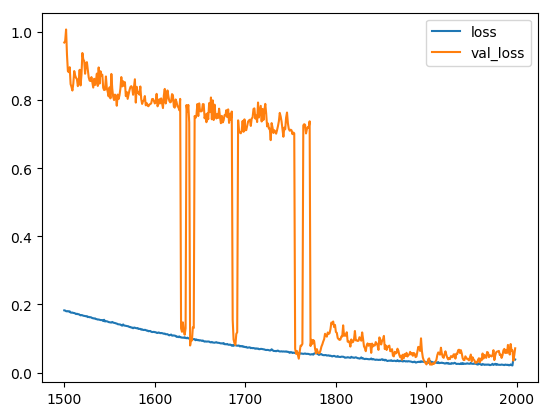

Minimum validation loss: 0.02330116555094719


In [156]:
#Validation loss develoment
history_df = pd.DataFrame(history.history)[1500:-1]
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.show()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [146]:
def relu_shifted(x):
    if x<34900:
        return 34900
    else:
        return x
       
X_train['NN_SCORE']=[x[0] for x in model.predict(X_train[col_preds].fillna(100))]
X_valid['NN_SCORE']=[x[0] for x in model.predict(X_valid[col_preds].fillna(100))]
train['NN_SCORE']=[x[0] for x in model.predict(train[col_preds].fillna(100))]
test['NN_SCORE']=[x[0] for x in model.predict(test[col_preds].fillna(100))]

X_train['NN_SCORE']=X_train['NN_SCORE'].apply(relu_shifted)
X_valid['NN_SCORE']=X_valid['NN_SCORE'].apply(relu_shifted)
train['NN_SCORE']=train['NN_SCORE'].apply(relu_shifted)
test['NN_SCORE']=test['NN_SCORE'].apply(relu_shifted)

46/46 [==============================] - 0s 3ms/step


In [147]:
# print('The Lift on the whole set is: '+ str(np.mean(whole_lifts)))
# print('The gini on the whole set is: '+ str(np.mean(whole_ginis)))
# print('\n')
print('The rmse on the train set is: '+ str(math.sqrt(mean_squared_log_error(X_train[col_target], X_train['NN_SCORE']))))
print('The rmse on the valid set is: '+ str(math.sqrt(mean_squared_log_error(X_valid[col_target], X_valid['NN_SCORE']))))
print('The rmse on the oot set is: '+ str(math.sqrt(mean_squared_log_error(train[col_target][1200:-1], train['NN_SCORE'][1200:-1]))))
print('\n')
print('The mae on the train set is: '+ str(mean_absolute_error(X_train[col_target], X_train['NN_SCORE'])))
print('The mae on the valid set is: '+ str(mean_absolute_error(X_valid[col_target], X_valid['NN_SCORE'])))
print('The mae on the oot set is: '+ str(mean_absolute_error(train[col_target][1200:-1], train['NN_SCORE'][1200:-1])))

The rmse on the train set is: 0.32764570286861766
The rmse on the valid set is: 0.31228491991213364
The rmse on the oot set is: 0.39051793125609746


The mae on the train set is: 59960.32264811198
The mae on the valid set is: 59727.505631510416
The mae on the oot set is: 60401.38783482143


In [148]:
train[['SalePrice', 'NN_SCORE']][1200:-1].head()

,SalePrice,NN_SCORE
1200,179000.0,162087.203125
1201,189000.0,261510.796875
1202,207500.0,305610.562500
1203,270000.0,293789.812500
1204,93000.0,97600.117188


In [149]:
train['abs_diff']=np.abs(train['SalePrice']-train['NN_SCORE'])

In [150]:
train['abs_diff'][1200:-1].describe()

count       259.000000
mean      60401.387835
std       49100.678086
min         128.593750
25%       26129.984375
50%       57581.796875
75%       81890.890625
max      503292.500000
Name: abs_diff, dtype: float64

In [151]:
train[['SalePrice', 'NN_SCORE']][1200:-1].describe()

,SalePrice,NN_SCORE
count,259.000000,259.000000
mean,172725.640927,225221.868198
std,72528.844409,93534.132326
min,60000.000000,34900.000000
25%,129000.000000,154806.835938
50%,153500.000000,214912.015625
75%,194250.000000,283972.359375
max,582933.000000,688042.500000


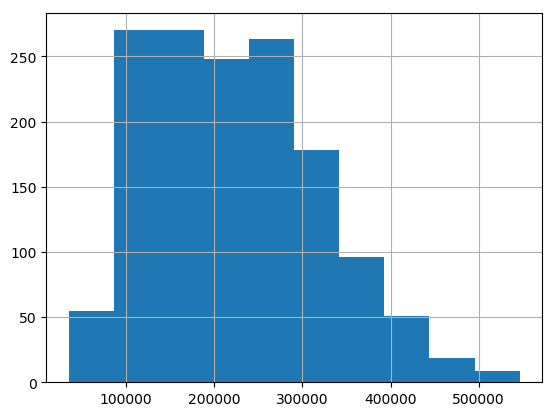

In [152]:
test['NN_SCORE'].hist()
plt.show()

In [195]:
test['SalePrice']=test['NN_SCORE']

In [196]:
test[['Id', 'SalePrice']].to_csv('Prediction_nn.csv', index=False)